## Standard Notch Filter Cascade

Filter Response and Transfer Function of a single Notch Filter:

![Notch Filter TF](notch_filter_tf.png "Notch Filter TF")

Passive Filter Circuit with two Notch filters in series:

![Cascaded Notch Filter Circuit](notch_filter_circuit.png "Cascaded Notch Filter Circuit")

In [22]:
import control
from control import step_response
from control import input_output_response
from control import bode_plot
from control.matlab import *

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import scipy.fftpack

import math

In [3]:
# Bandreject (standard notch filter, zero freq. = pole freq.) @ 1 kHz

freq = 1.0*1e3
wz = 2 * math.pi * freq
wo = wz
Q = 5

num = [1, 0, wz**2]
den = [1, (wo/Q)*1, wo**2]
filt1 = tf(num, den)

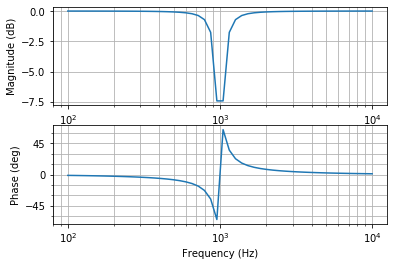

In [4]:
mag, phase, omega = bode(filt1)

In [5]:
# Bandreject (standard notch filter, zero freq. = pole freq.) @ 10 kHz

freq = 10.0*1e3
wz = 2 * math.pi * freq
wo = wz
Q = 5

# Transfer function
num = [1, 0, wz**2]
den = [1, (wo/Q)*1, wo**2]
filt2 = tf(num, den)

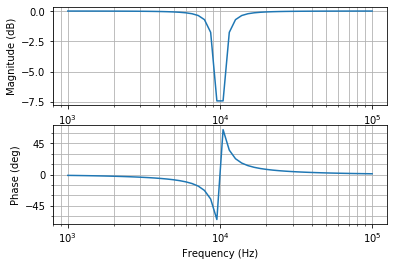

In [6]:
mag, phase, omega = bode(filt2)

In [7]:
# Cascade the filters
sys = series(filt1, filt2)

# Check to see if a system is single input, single output
issiso(sys)

True

In [7]:
# Check to see if a system is a discrete-time system
isdtime(sys)

True

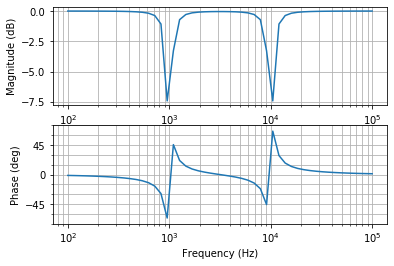

In [8]:
mag, phase, omega = bode(sys)

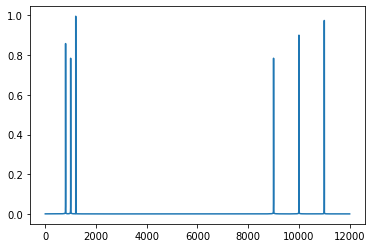

In [9]:
# Create input signal composed of six sine waves @ 800Hz, 1kHz, 1.2kHz, 9kHz, 10kHz, 11kHz
# Plot FFT decomposed signal

# Number of samplepoints
N = 80000
# sample spacing
T = 1.0 / 24000.0

# input signal
x = np.linspace(0.0, N*T, N)
y = np.sin(800.0 * 2.0*np.pi*x) + np.sin(1000.0 * 2.0*np.pi*x) + np.sin(1200.0 * 2.0*np.pi*x) + np.sin(9000.0 * 2.0*np.pi*x) + np.sin(10000.0 * 2.0*np.pi*x) + np.sin(11000.0 * 2.0*np.pi*x)

yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [12]:
# Apply filter to input signal
yout, time, xout = lsim(sys, y, x)

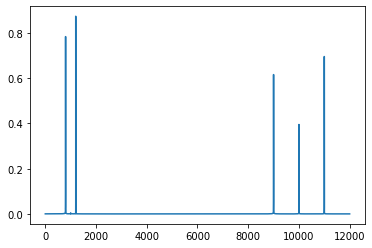

In [13]:
# Plot FFT decomposed output signal

# Number of samplepoints
N = 80000
# sample spacing
T = 1.0 / 24000.0

# output signal
x = time
y = yout

yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()